In [6]:
# import load_model
from tensorflow.keras.models import load_model

import numpy as np
import pandas as pd

In [3]:
# load AI model from Models
model = load_model("./Models/model_20230111-101714.h5")

2023-01-11 12:21:25.316394: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-11 12:21:25.316655: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-11 12:21:25.316712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-11 12:21:25.316758: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-11 12:21:25.316805: W tensorflow/c

In [32]:
# read data from file into pandas dataframe
df = pd.read_csv("./Data/dataset/VETUSDT.csv")


LOOKBACK_WINDOW = 20

# create sequences from dataframe
sequences = []
for i in range(LOOKBACK_WINDOW - 1, len(df)):
    sequences.append(df[i:i+LOOKBACK_WINDOW])

# create numpy array from sequences
sequences = np.array(sequences)




/tmp/ipykernel_425223/2213191674.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array(sequences)


(525578,)

In [40]:
first_item = sequences[0]
first_item = pd.DataFrame(first_item)

original_items = ['event_time','original_open', 'original_close', 'original_high', 'original_low', 'original_volume']


# create nice comment that explains what this function does

# Receives an index and returns the data for the training and for the environment
def get_train_env_data(data, index):
    item = pd.DataFrame(data[i])
    return item[original_items], item.drop(original_items, axis=1)

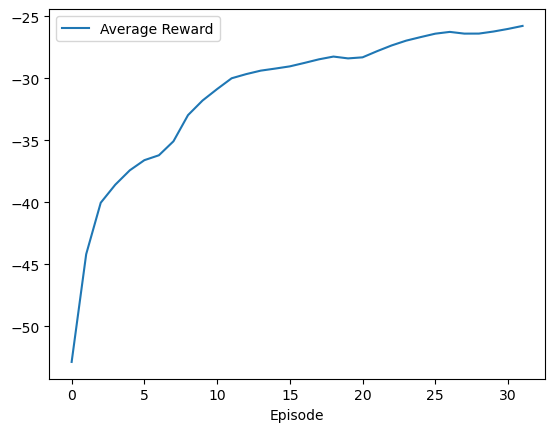

In [51]:
from matplotlib import pyplot as plt
# plot data from csv file
def plot_data(data):
    plt.plot(data)
    plt.xlabel("Episode")
    plt.legend(["Average Reward"])
    plt.show()

training_history = pd.read_csv("./Results/reward_history_20230111-151913.csv")

plot_data(training_history['average_reward'])

In [53]:
%load_ext tensorboard
%tensorboard --logdir Training/logs/fit